<function matplotlib.pyplot.show(close=None, block=None)>

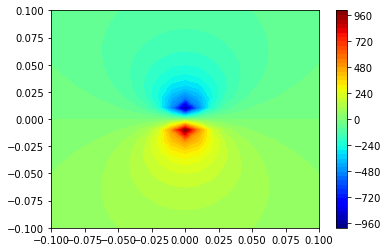

In [86]:
import numpy as np
import matplotlib.pyplot as plt

delta_h = 0.01
N = 10

coordinate =[[i for i in range(-N,N+1,1)] for j in range(-N,N+1,1)]
#print(coodinate)

x = [i for i in range(-N,N+1,1)]
Xlist =np.array(x)*delta_h

coordinate_X = np.array(coordinate)*delta_h
#print(coordinate_X)

coordinate_Y = coordinate_X.T
#print(coordinate_Y)

listXY = coordinate_X**2 + coordinate_Y**2
#print(listXY)

zero = int(len(coordinate_X)/2)

listXY[zero][zero] = (listXY[zero-1][zero]+listXY[zero+1][zero]+listXY[zero][zero-1]+listXY[zero][zero+1])/4

hydrostatic_pressure = -10*coordinate_Y / listXY
#print(hydrostatic_pressure)

X, Y = np.meshgrid(Xlist, Xlist)

cont=plt.contourf(X,Y,hydrostatic_pressure,levels=50,cmap="jet")
plt.colorbar(cont)
plt.show

In [ ]:
k1 = 1-2*listX*listY/listXY
k2 = (listX**2-listY**2)/listXY

C = [[0.1 for i in range(-N,N+1,1)] for j in range(-N,N+1,1)]

C = np.array(C)

C_next = [[1 for i in range(-N,N+1,1)] for j in range(-N,N+1,1)]

for k in range(100):
    for i in range(-(N-1),N):
        for j in range(-(N-1),N):
            C_next[i][j] = (C[i+1][j]+C[i][j+1]+(1-k1[i][j]*delta_h)*C[i-1][j]+(1-k2[i][j]*delta_h)*C[i][j-1])/(4-(k1[i][j]+k2[i][j])*delta_h)

    for i in range (-(N-1),N,1):
        for j in range (-(N-1),N,1):
            C[i][j] = C_next[i][j]

C_array = np.array(C)

plt.contourf(listX,listY,C_array)
plt.show